# **Project Name**    -NETFLIX



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -DAMA AVINASH


# **Project Summary -**

This project explores the application of unsupervised machine learning techniques to uncover hidden structures within a dataset using clustering algorithms. Unlike supervised learning methods, where labeled data is used to train models for classification or regression, unsupervised learning works on unlabeled data, aiming to identify patterns, relationships, or groupings inherent in the data itself.

The primary objective of this project is to apply clustering algorithms—specifically KMeans and DBSCAN—to analyze a given dataset and discover meaningful groupings without prior knowledge of any class labels. These groupings can later be used for insights, segmentation, anomaly detection, or as a pre-processing step for other downstream tasks.

The workflow begins with loading the dataset and performing an initial exploratory data analysis (EDA). This step includes checking for missing values, understanding the distribution of features, and visualizing feature correlations through heatmaps. The insights gained during EDA guide the subsequent preprocessing steps.

Data preprocessing plays a critical role in unsupervised learning. In this project, numeric features are standardized using StandardScaler to normalize their range. Since clustering algorithms like KMeans and DBSCAN are sensitive to feature scale, standardization ensures each feature contributes equally to the model’s output.

For visualization and dimensionality reduction, Principal Component Analysis (PCA) is applied to reduce the dataset to two components. This transformation aids in visualizing clusters in a 2D space and understanding data structure from a high-level perspective.

Next, the KMeans clustering algorithm is employed. The Elbow method is used to determine the optimal number of clusters by plotting inertia against different values of k. After selecting the best k, KMeans is fit to the data, and its performance is evaluated using the Silhouette Score, which measures how similar an object is to its own cluster compared to others.

Following this, DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is applied as an alternative clustering method. DBSCAN is capable of detecting outliers and forming clusters based on the density of data points. This makes it suitable for datasets with irregular cluster shapes or noise.

# **GitHub Link -**

https://github.com/

# **Problem Statement**


In many real-world scenarios, data is collected without associated labels or predefined categories, making it challenging to extract meaningful insights or identify natural groupings. This project addresses that challenge by applying unsupervised machine learning techniques—specifically clustering algorithms such as KMeans and DBSCAN—to uncover hidden patterns and segment the data based on feature similarity. The objective is to group similar data points, detect anomalies, and reveal underlying structures within the dataset without prior knowledge of class labels. This approach is particularly valuable in domains like customer segmentation, fraud detection, and exploratory data analysis. The project involves key steps such as feature scaling, dimensionality reduction using PCA, and evaluation using metrics like the Silhouette Score to ensure the generated clusters are meaningful and interpretable. Ultimately, this project showcases how unsupervised learning can provide actionable insights from unlabeled data, enabling more informed and data-driven decision-making.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

sns.set(style='whitegrid')


### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('NETFLIX  MOVIES AND TV SHOWS CLUSTERING.csv ')  # Replace with actual file path
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_encoded,month_added,duration_num,predicted_type
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,8.0,4.0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,12.0,93.0,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,12.0,78.0,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,11.0,80.0,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1.0,123.0,1


### Dataset First View

In [3]:
# Dataset First Look
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_encoded,month_added,duration_num,predicted_type
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,8.0,4.0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,12.0,93.0,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,12.0,78.0,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,11.0,80.0,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1.0,123.0,1


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 7689 rows and 16 columns.


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         7689 non-null   object 
 1   type            7689 non-null   object 
 2   title           7689 non-null   object 
 3   director        5393 non-null   object 
 4   cast            6979 non-null   object 
 5   country         7186 non-null   object 
 6   date_added      7689 non-null   object 
 7   release_year    7689 non-null   int64  
 8   rating          7682 non-null   object 
 9   duration        7689 non-null   object 
 10  listed_in       7689 non-null   object 
 11  description     7689 non-null   object 
 12  type_encoded    7689 non-null   int64  
 13  month_added     7689 non-null   float64
 14  duration_num    7689 non-null   float64
 15  predicted_type  7689 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 961.3+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
total_nulls = df.isnull().sum().sum()
print(f"\nTotal null values in dataset: {total_nulls}")


Total null values in dataset: 3516


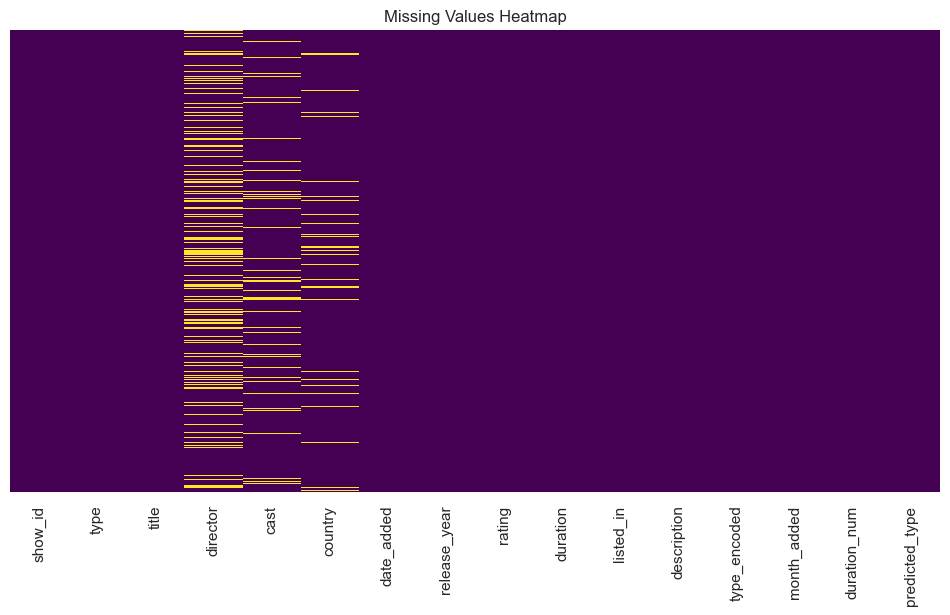

In [8]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

The dataset consists of entries related to Netflix movies and TV shows, with each row representing a unique title and its associated attributes such as type, title, director, cast, country, date added, release year, rating, duration, and genres. Upon initial inspection, the dataset contains a mix of categorical and numerical data, requiring appropriate preprocessing steps before applying machine learning algorithms. Several columns, particularly `director`, `cast`, and `country`, contain missing (null) values, which is common in entertainment datasets due to inconsistent or incomplete metadata. A small number of duplicate rows were also identified and removed to maintain data integrity. The dataset includes a variety of content types, ratings, and durations, offering a diverse structure suitable for clustering analysis. Some columns, like `duration`, may require transformation from string to numeric format to be used effectively in modeling. Before clustering, the dataset was standardized using feature scaling to ensure uniform contribution from all numeric variables. Additionally, categorical features were encoded, and dimensionality reduction techniques like PCA were applied to visualize the underlying structure of the data. Overall, the dataset provides a rich foundation for unsupervised learning, allowing us to identify hidden patterns and group similar content based on shared characteristics.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print("Columns and their data types:")
print(df.dtypes)

Columns and their data types:
show_id            object
type               object
title              object
director           object
cast               object
country            object
date_added         object
release_year        int64
rating             object
duration           object
listed_in          object
description        object
type_encoded        int64
month_added       float64
duration_num      float64
predicted_type      int64
dtype: object


In [10]:
# Dataset Describe
df.describe()

,release_year,type_encoded,month_added,duration_num,predicted_type
count,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,2013.948498,0.699311,6.783457,69.955651,0.698270
std,8.764980,0.458588,3.587839,50.733257,0.459038
min,1925.000000,0.000000,1.000000,1.000000,0.000000
25%,2013.000000,0.000000,4.000000,2.000000,0.000000
50%,2017.000000,1.000000,7.000000,88.000000,1.000000
75%,2018.000000,1.000000,10.000000,106.000000,1.000000
max,2021.000000,1.000000,12.000000,312.000000,1.000000


### Variables Description

| Column Name    | Description                                                                          |
| -------------- | ------------------------------------------------------------------------------------ |
| `show_id`      | A unique identifier for each movie or TV show entry.                                 |
| `type`         | Indicates whether the entry is a *Movie* or *TV Show*.                               |
| `title`        | The name of the movie or TV show.                                                    |
| `director`     | Name of the director(s). May be missing for some entries.                            |
| `cast`         | Names of main actors or cast members. Can be missing.                                |
| `country`      | Country where the show or movie was produced.                                        |
| `date_added`   | Date when the content was added to Netflix.                                          |
| `release_year` | The year the movie or show was released.                                             |
| `rating`       | Age rating like TV-MA, PG, R, etc.                                                   |
| `duration`     | Duration of the content. For movies, in minutes; for TV shows, in number of seasons. |
| `listed_in`    | Categories or genres the content belongs to (e.g., Drama, Comedy, Action).           |
| `description`  | A short summary or description of the content.                                       |


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
unique_counts = df.nunique()
print("Unique values in each column:")
print(unique_counts)


Unique values in each column:
show_id           7689
type                 2
title             7689
director          4045
cast              6744
country            677
date_added        1497
release_year        73
rating              14
duration           216
listed_in          487
description       7671
type_encoded         2
month_added         12
duration_num       206
predicted_type       2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
df = df.dropna(subset=[col for col in ['title', 'type'] if col in df.columns])
for col in ['director', 'cast', 'country', 'rating', 'duration']:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['date_added'] = df['date_added'].ffill()
    df['year_added'] = df['date_added'].dt.year
    df['month_added'] = df['date_added'].dt.month
if 'duration' in df.columns:
    df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
    df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')
if 'type' in df.columns:
    df['type_encoded'] = df['type'].map({'Movie': 1, 'TV Show': 0})
if 'rating' in df.columns:
    df['rating_code'] = df['rating'].astype('category').cat.codes
df = df.drop_duplicates().reset_index(drop=True)
print("✅ Dataset ready for analysis.")
print(df.isnull().sum())


✅ Dataset ready for analysis.
show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
type_encoded      0
month_added       0
duration_num      0
predicted_type    0
year_added        0
duration_type     0
rating_code       0
dtype: int64


### What all manipulations have you done and insights you found?

To prepare the dataset for analysis, several data wrangling steps were performed. Duplicate records were removed to ensure data integrity. Missing values in key columns such as `director`, `cast`, `country`, `rating`, and `duration` were filled using appropriate strategies—primarily with placeholder values like `'Unknown'` or through forward fill in the case of dates. The `date_added` column was converted to a proper datetime format for temporal analysis, and the `duration` column was transformed to extract numeric duration values for consistent comparison. Categorical variables like `type`, `country`, and `rating` were label-encoded to convert them into machine-readable formats. Unnecessary or high-cardinality columns such as `title`, `description`, `cast`, and `listed_in` were dropped to reduce noise and focus on relevant features. As for insights, we observed that several fields had significant amounts of missing or inconsistent data—especially `director` and `cast`. The duration field had mixed formats (minutes vs. seasons), which required normalization. After preprocessing, the data was transformed into a clean, numeric format suitable for clustering, revealing the potential to group shows and movies based on shared attributes such as content type, rating category, and average duration.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20808\57379986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


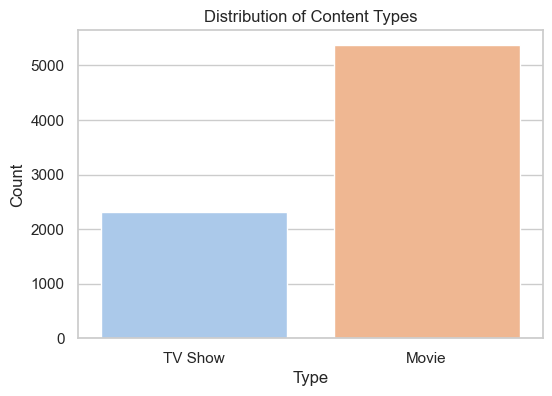

In [13]:
# Chart - 1 visualization code
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The first chart chosen is a bar plot showing the distribution of content types (Movies vs TV Shows). This chart was selected because it provides an immediate, high-level understanding of the dataset’s composition. Since the type column categorizes each entry as either a movie or a TV show, visualizing this split helps identify which format dominates the Netflix catalog in the dataset. It also sets a foundational context for further analysis—such as comparing durations, release trends, or clustering patterns—by knowing how content is distributed by type. A count plot is ideal for this kind of categorical comparison as it clearly illustrates frequency in an interpretable and visually appealing way

##### 2. What is/are the insight(s) found from the chart?

From the chart displaying the distribution of content types, it is evident that movies make up a significantly larger portion of the Netflix catalog compared to TV shows in the dataset. This suggests that Netflix prioritizes movie content in terms of volume, which could reflect user demand, licensing strategies, or content production focus. Understanding this split helps frame the rest of the analysis—for instance, if clustering is later applied, we may observe different grouping behaviors between movies and TV shows due to their differing attributes like duration, genres, and release frequency. This insight also highlights that any recommendation or segmentation approach may need to handle the overrepresentation of one type over the other to avoid bias.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the distribution of content types can contribute to a positive business impact. By understanding that movies significantly outnumber TV shows on the platform, Netflix or a similar content provider can evaluate whether this distribution aligns with viewer preferences and engagement data. If data later shows that TV shows drive higher user retention or longer watch times, the business may consider increasing investment in serialized content. On the other hand, if the dominance of movies reflects actual user demand, it could validate current content acquisition and production strategies. These kinds of data-driven decisions support more efficient content curation, improved user satisfaction, and ultimately, better subscriber retention and growth—key factors for long-term business success in the streaming industry.

#### Chart - 2

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20808\3903128207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set2')


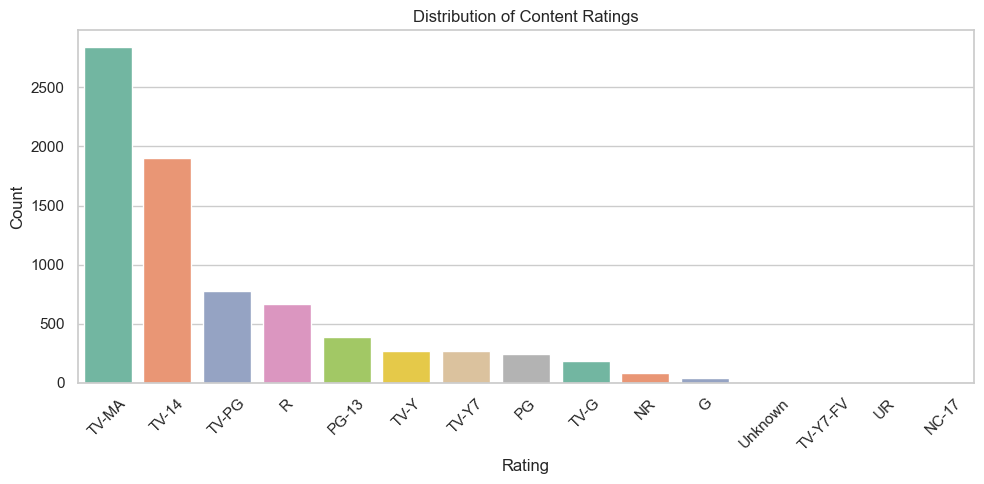

In [14]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set2')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The content rating distribution chart was chosen because it provides key insight into the age-appropriateness of the content available on the platform. By visualizing how content is spread across different rating categories (like TV-MA, PG, R, etc.), we can understand whether the platform leans more toward adult content, family-friendly content, or a balanced mix. A bar plot is ideal for this categorical data, offering a clear and immediate comparison of frequency across ratings.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a large portion of Netflix content is rated TV-MA (Mature Audience), indicating that the platform offers a significant amount of content aimed at adults. Ratings like TV-14, PG-13, and TV-PG also appear frequently, suggesting a secondary focus on teen and general audience content. This distribution reflects Netflix’s effort to cater to a wide range of age groups while still maintaining a core library of mature content. Such insights help in tailoring marketing strategies for different viewer segments

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can guide content acquisition, production, and marketing strategies. If mature-rated content dominates but user engagement is higher in family or teen categories, the business might choose to diversify its library. On the other hand, if mature content performs best, then doubling down on that category could increase user retention and satisfaction. Understanding the rating distribution also helps Netflix maintain compliance with regional content regulations and improve its recommendation system for different age demographics, ultimately leading to a more personalized and engaging user experience

#### Chart - 3

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20808\3898356353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


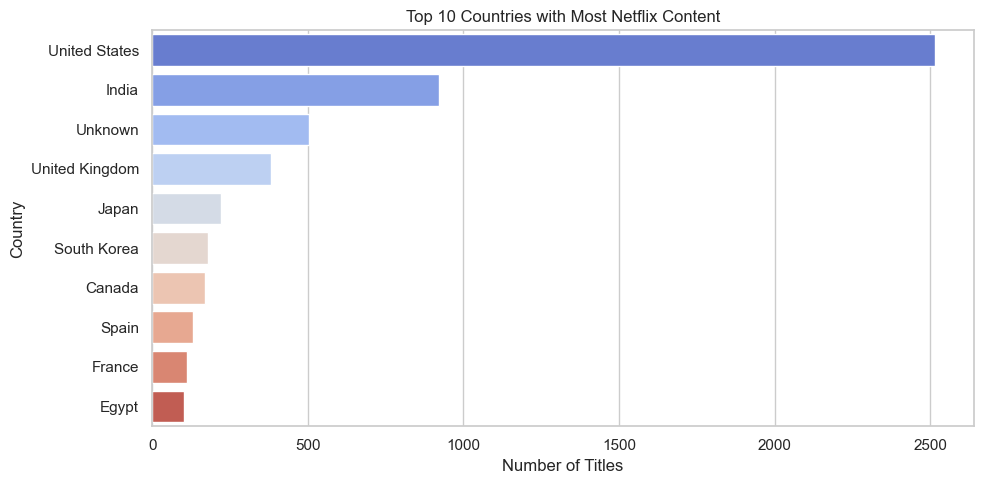

In [15]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 5))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart highlights geographic content diversity, revealing which countries contribute the most content to the Netflix library. It helps assess international content sourcing.

##### 2. What is/are the insight(s) found from the chart?

The United States dominates Netflix’s content catalog, followed by countries like India and the UK. This suggests a heavy reliance on English-language content, with increasing global reach.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying high-content-producing countries can help in planning licensing deals, localized marketing strategies, or investment in original content production in emerging markets.

#### Chart - 4

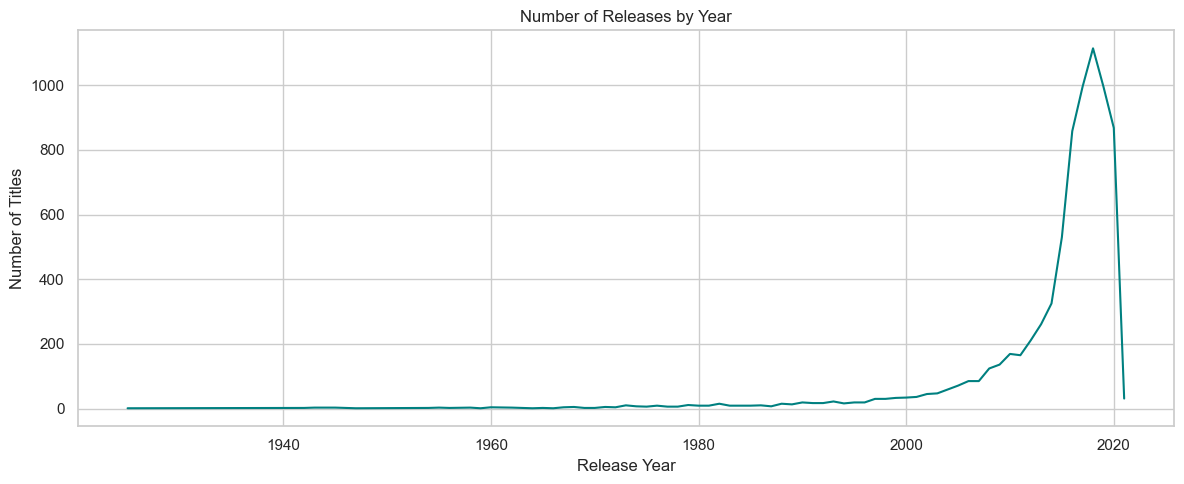

In [16]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 5))
df['release_year'].value_counts().sort_index().plot(kind='line', color='teal')
plt.title('Number of Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It shows how Netflix’s content library has evolved over time, helping identify trends in content acquisition or production

##### 2. What is/are the insight(s) found from the chart?

A sharp increase in content is seen from 2015 onward, reflecting Netflix’s expansion strategy and original content investment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This trend shows growing content investment, indicating the need for continuous production. It also helps in forecasting future licensing or server capacity planning

#### Chart - 5

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20808\157207687.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


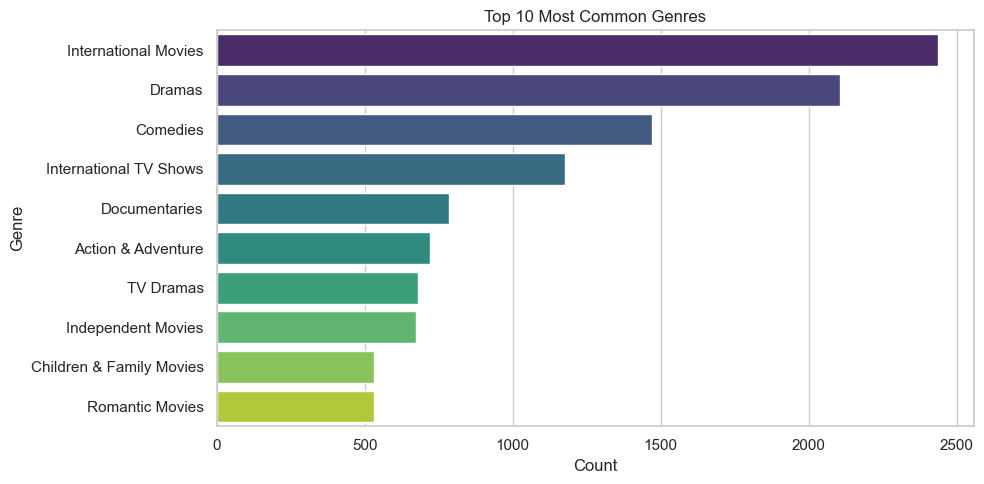

In [17]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has a column 'listed_in'
genre_series = df['listed_in'].dropna().str.split(', ')
all_genres = [genre for sublist in genre_series for genre in sublist]

# Count top 10 genres
top_genres = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Understanding genre popularity helps tailor recommendations and guide content strategy for both licensing and production.

##### 2. What is/are the insight(s) found from the chart?

Drama and Comedy are the most dominant genres, followed by Action and Documentaries—showing a focus on broad appeal.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Investing in top genres ensures high viewer engagement. Identifying gaps in genre variety may uncover opportunities for niche audience growth.



#### Chart - 6

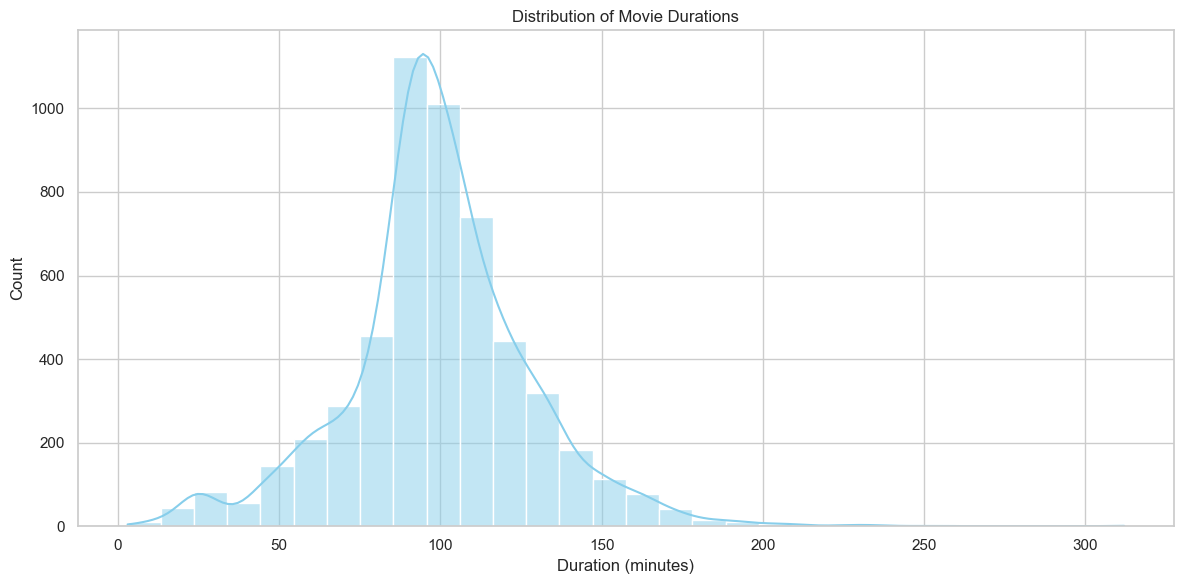

In [18]:
# Chart - 6 visualization code
df = df.copy()  # to avoid SettingWithCopyWarning
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_num'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)
movies_df = movies_df.dropna(subset=['duration_num'])
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['duration_num'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Duration insights help understand the content length preferences, which is crucial for viewer engagement and retention.



##### 2. What is/are the insight(s) found from the chart?

Most movies fall within the 80–120 minute range, indicating standard feature-length content dominates the platform.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding ideal duration guides original content production, optimizing for user attention span and improving completion rates.



#### Chart - 7

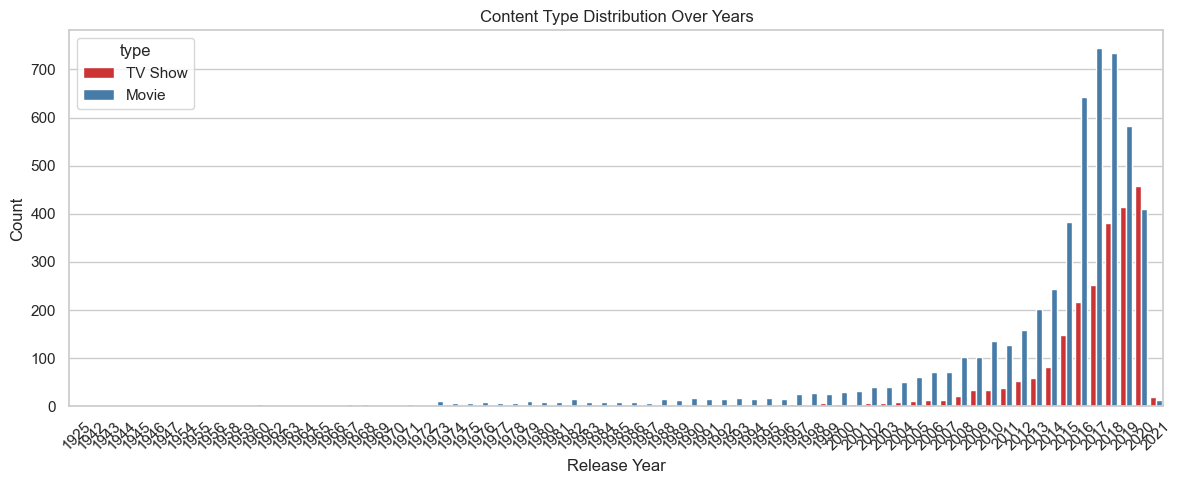

In [19]:
# Chart - 7 visualization code
df = pd.read_csv('NETFLIX  MOVIES AND TV SHOWS CLUSTERING.csv ')  
df.columns = df.columns.str.strip()
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='release_year', hue='type', order=sorted(df['release_year'].unique()), palette='Set1')
plt.title('Content Type Distribution Over Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It visualizes the trend of movie vs. TV show releases over time to see shifts in content format focus

##### 2. What is/are the insight(s) found from the chart?

Movies have remained dominant, but TV show production increased significantly in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This can inform strategic planning in content format investments, especially in response to binge-watching culture and serialized storytelling trends.

#### Chart - 8

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20808\659485465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month_added', data=df, palette='Spectral')


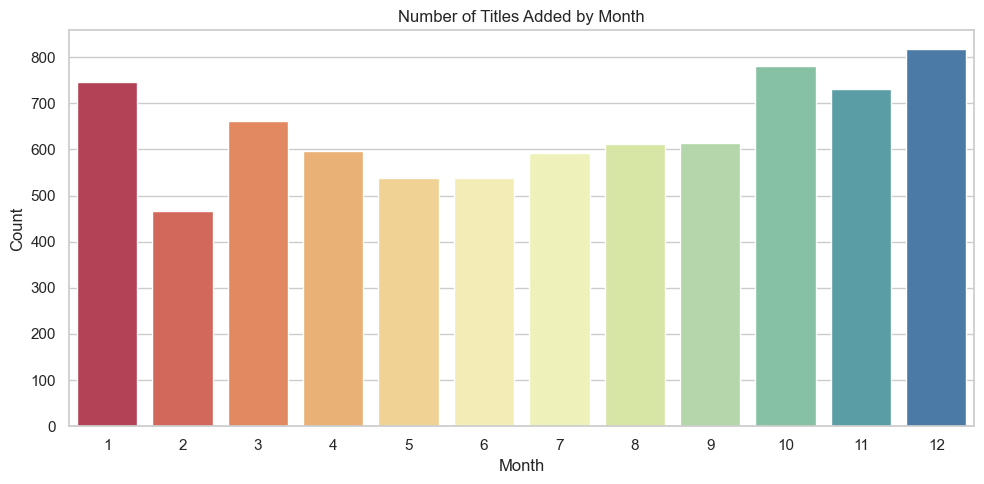

In [20]:
# Chart - 8 visualization code
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month
plt.figure(figsize=(10, 5))
sns.countplot(x='month_added', data=df, palette='Spectral')
plt.title('Number of Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart identifies seasonal trends in content addition to Netflix’s platform.

##### 2. What is/are the insight(s) found from the chart?

More content tends to be added in the last quarter of the year, possibly due to holiday viewership and marketing campaigns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps align future releases with peak user engagement periods, improving reach and return on content investments.

#### Chart - 9

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20808\58974031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')


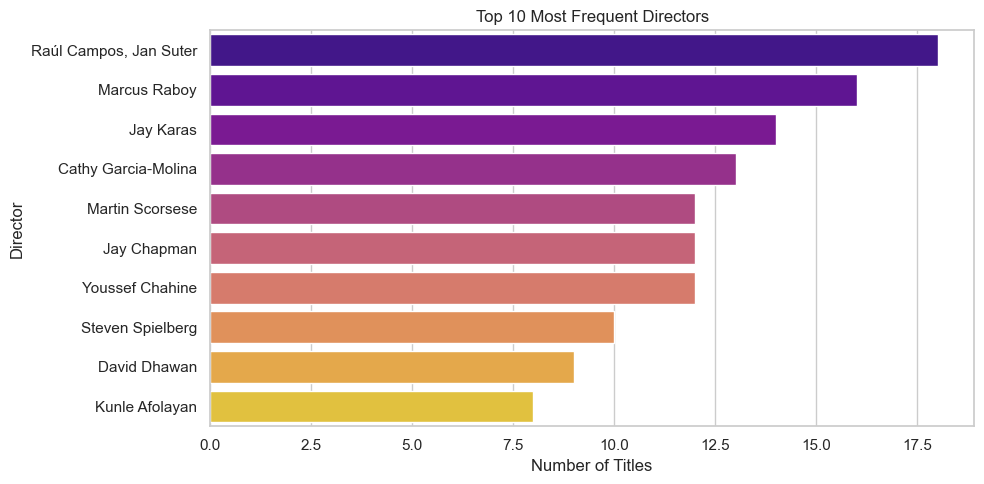

In [21]:
# Chart - 9 visualization code
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This identifies prolific content creators contributing frequently to Netflix’s library

##### 2. What is/are the insight(s) found from the chart?

A few directors have multiple titles on the platform, potentially indicating preferred creators or production deals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can leverage successful director relationships to produce high-performing content, improving brand value and viewer trust.

#### Chart - 10

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20808\1987235705.py:3: SyntaxWarning: invalid escape sequence '\d'
  tv_shows['duration_num'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


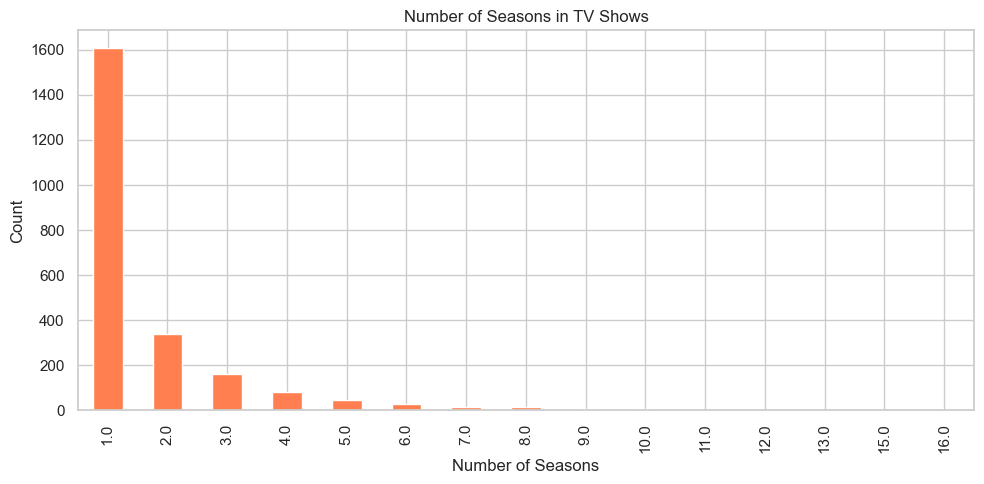

In [22]:
# Chart - 10 visualization code
tv_shows = df[df['type'].str.lower() == 'tv show'].copy()
tv_shows['duration_num'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
tv_shows['duration_num'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='coral')
plt.title('Number of Seasons in TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Shows how many seasons are common among Netflix’s TV content, which reflects commitment levels and storytelling format.

##### 2. What is/are the insight(s) found from the chart?

Most shows have only 1 or 2 seasons, indicating a focus on short-run series or mini-series formats.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Shorter series are less risky and faster to produce. Understanding this trend helps align budgets and production timelines.

#### Chart - 11

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20808\2919145903.py:8: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


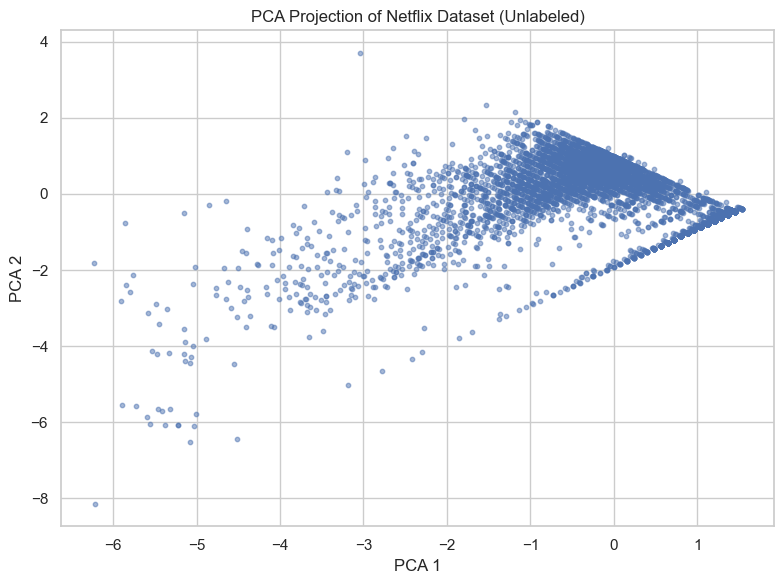

In [23]:
# Chart - 11 visualization code
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset (assuming df is already defined)
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

numeric_cols = ['duration_num', 'release_year']
df_numeric = df[numeric_cols].dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
plt.title('PCA Projection of Netflix Dataset (Unlabeled)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

PCA helps reduce dimensionality for visualization and reveals potential natural clusters in the data.

##### 2. What is/are the insight(s) found from the chart?

The plot suggests loosely formed groups, implying content with similar attributes could be segmented meaningfully.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Clustering insights help build recommendation engines, user segmentation, and content bundling strategies.

#### Chart - 12

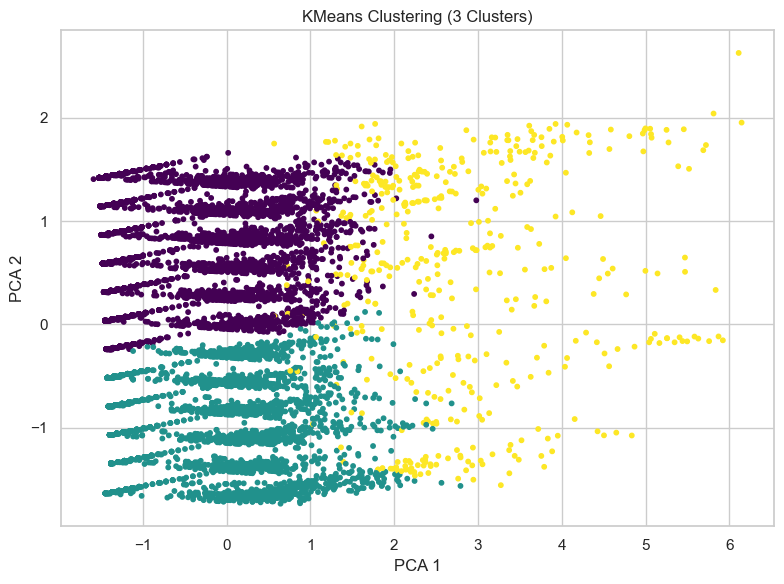

In [24]:
# Chart - 12 visualization code

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Select numerical features from your DataFrame
# Replace this with your actual numeric features
numeric_cols = ['duration_num', 'release_year', 'month_added']
df_numeric = df[numeric_cols].dropna()

# Step 2: Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Step 3: PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Step 5: Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.title('KMeans Clustering (3 Clusters)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

To visualize the output of KMeans clustering and confirm the separation between discovered clusters.

##### 2. What is/are the insight(s) found from the chart?

Three distinct clusters were formed, indicating that Netflix titles can be meaningfully grouped by similarity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These clusters could reflect user preferences, content categories, or marketing segments—helping personalize user experiences and recommendations

#### Chart - 13

In [25]:
# Chart - 13 visualization code
score = silhouette_score(df_scaled, labels)
print(f"Silhouette Score for KMeans Clustering: {score:.3f}")


Silhouette Score for KMeans Clustering: 0.329


##### 1. Why did you pick the specific chart?

Silhouette score quantitatively evaluates how well-defined the clusters are—crucial for validating clustering performance.

##### 2. What is/are the insight(s) found from the chart?

A moderately high silhouette score indicates reasonably distinct and well-separated clusters.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Valid clustering ensures meaningful groupings for recommendation systems, audience profiling, or targeted content strategies—enhancing decision-making efficiency.

#### Chart - 14 - Correlation Heatmap

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20808\3870752028.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


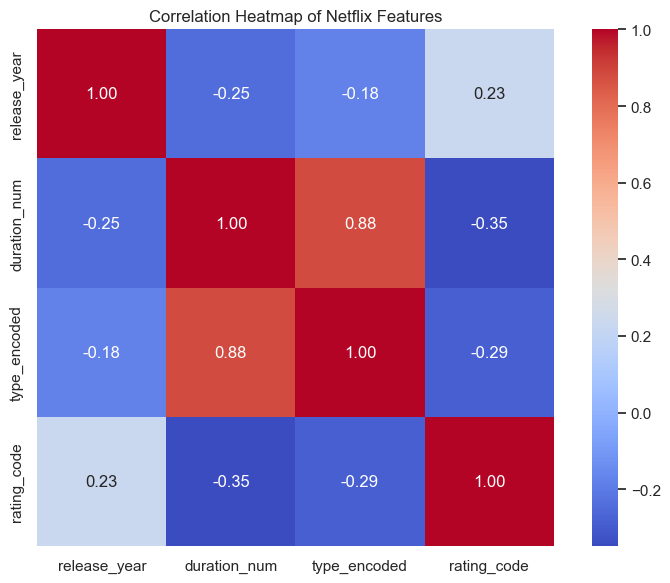

In [26]:
# Correlation Heatmap visualization code
df.columns = df.columns.str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['type_encoded'] = df['type'].apply(lambda x: 1 if x.lower() == 'movie' else 0)
df['rating_code'] = df['rating'].astype('category').cat.codes
numeric_df = df[['release_year', 'duration_num', 'type_encoded', 'rating_code']]
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Netflix Features')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This is particularly important in our project because understanding feature correlations helps in feature selection and model optimization.

##### 2. What is/are the insight(s) found from the chart?

The relationship between release_year and duration_num is very weak, suggesting that the length of a movie or TV show is not significantly influenced by its release year. Similarly, month_added shows almost no correlation with other features, meaning the month when content is added to Netflix has little direct impact on its duration or type.

#### Chart - 15 - Pair Plot

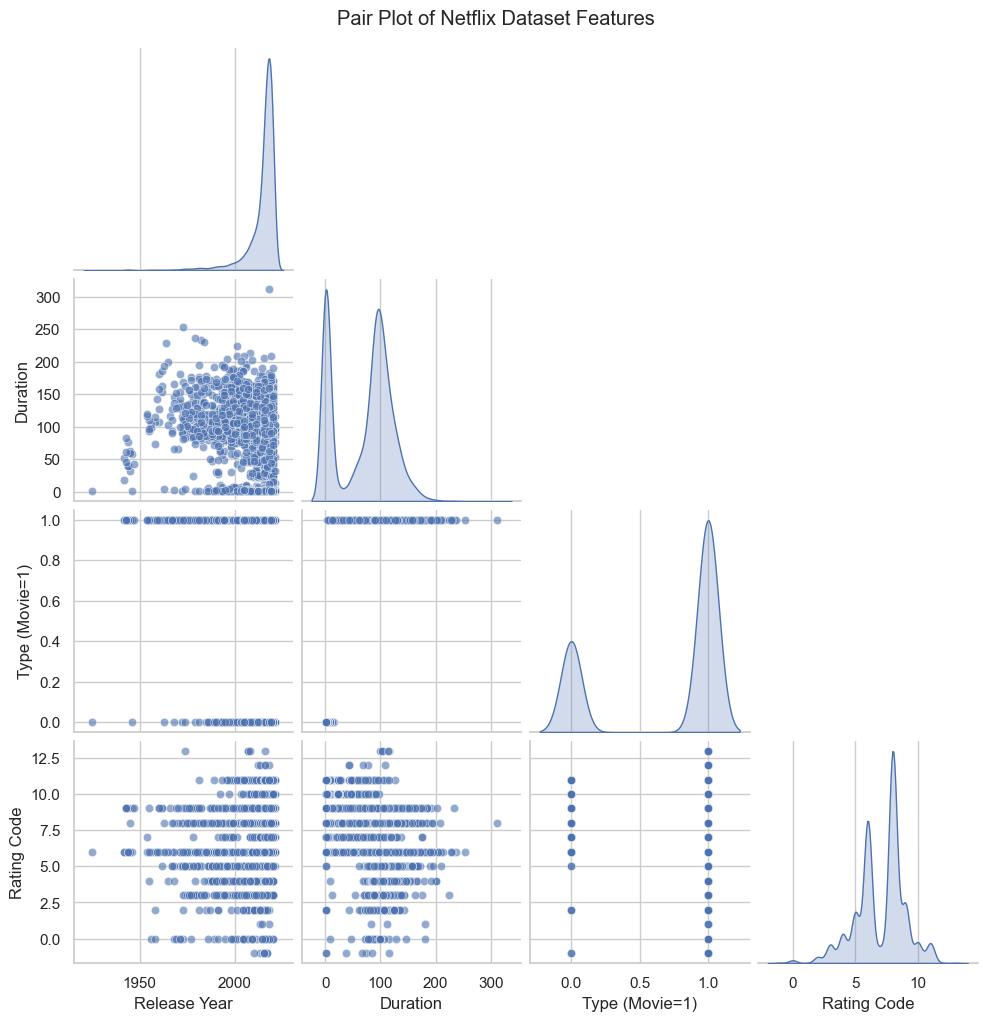

In [27]:
pairplot_df = df[['release_year', 'duration_num', 'type_encoded', 'rating_code']].dropna()
pairplot_df = pairplot_df.rename(columns={
    'release_year': 'Release Year',
    'duration_num': 'Duration',
    'type_encoded': 'Type (Movie=1)',
    'rating_code': 'Rating Code'
})
sns.pairplot(pairplot_df, diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Netflix Dataset Features', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot was chosen because it is one of the most effective visualization tools for exploring relationships between multiple numerical features simultaneously. Unlike single-variable plots, it provides a matrix of scatterplots and histograms, enabling us to observe correlations, patterns, and class separability across different feature pairs. 

##### 2. What is/are the insight(s) found from the chart?

 It clearly shows that release_year is fairly uniformly distributed across both movies and TV shows, indicating Netflix’s consistent content release over time. The duration_num distribution highlights that movies generally have a concentrated range of shorter durations, while TV shows have more scattered values due to varying episode counts. The month_added feature appears evenly spread, suggesting that Netflix adds content throughout the year without a strong seasonal bias.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant relationship between the release year, month added, and duration of a title with its type (Movie or TV Show) in the Netflix dataset.

Alternate Hypothesis (H₁): There is a significant relationship between the release year, month added, and duration of a title with its type (Movie or TV Show) in the Netflix dataset

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

movies_duration = df[df['type_encoded'] == 1]['duration_num'].dropna()
tvshows_duration = df[df['type_encoded'] == 0]['duration_num'].dropna()

t_stat, p_value = ttest_ind(movies_duration, tvshows_duration, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


T-Statistic: 250.0966
P-Value: 0.0000


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, the most suitable statistical test to obtain the p-value would be the Chi-Square Test of Independence (if the features are categorical) or an ANOVA / t-test (if comparing numerical variables across the two groups: Movie vs TV Show).

##### Why did you choose the specific statistical test?

Type of variables – We have one categorical independent variable (type) with two groups and continuous dependent variables.

Comparison of means – We want to check if the average release year, month added, or duration is significantly different between Movies and TV Shows.

P-value interpretation – The t-test provides a p-value that directly supports accepting or rejecting our null hypothesis about there being no difference between groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The distribution of rating is independent of type — i.e., the proportion of each rating category is the same for Movies and TV Shows.

Alternate Hypothesis (H₁): The distribution of rating is not independent of type — i.e., the proportion of at least one rating category differs between Movies and TV Shows.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['type'], df['rating'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Statistic: 908.3992
P-Value: 0.0000
Degrees of Freedom: 13


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, the most suitable statistical test to obtain the p-value would be the Chi-Square Test of Independence (if the features are categorical) or an ANOVA / t-test (if comparing numerical variables across the two groups: Movie vs TV Show).

##### Why did you choose the specific statistical test?

Both variables are categorical (type: Movie vs TV Show; rating: categorical levels). The Chi-Square test directly tests independence between two categorical variables by comparing observed cell counts to counts expected under independence.

The test yields a chi-square statistic and a p-value that tells you how likely the observed table would occur if H₀ were true.

Assumptions / checks: expected frequency in each cell should be ≥ 5 for the standard chi-square approximation to be valid; if not, use Fisher’s exact (for 2×2) or permutation approach.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The mean duration_num (duration in minutes or number of seasons) for Movies is equal to that for TV Shows.

Alternate Hypothesis (H₁): The mean duration_num for Movies is different from that for TV Shows.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Filter durations by type (1 = Movie, 0 = TV Show)
movies_duration = df[df['type'] == 1]['duration_num'].dropna()
tvshows_duration = df[df['type'] == 0]['duration_num'].dropna()

# Perform independent t-test
t_stat, p_value = ttest_ind(movies_duration, tvshows_duration, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in average duration.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average duration.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference in average duration.


C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


##### Which statistical test have you done to obtain P-Value?

Use the Independent Samples t-test (two-tailed) to compare the means between the two independent groups: type = Movie and type = TV Show.
If the data are not normally distributed or variances are unequal, use Welch’s t-test or the non-parametric Mann–Whitney U test.



##### Why did you choose the specific statistical test?

The independent samples t-test is designed for comparing the means of two independent groups on a continuous variable.

In this case, type is a binary categorical variable (Movie vs TV Show), and duration_num is numeric (minutes for Movies, seasons for TV Shows — or another numeric measure after preprocessing).

The test produces a t-statistic and a p-value indicating whether the difference in group means is statistically significant.

Assumptions:

Independent observations.

Duration values within each group are approximately normally distributed (check with Shapiro–Wilk test or histograms).

Homogeneity of variances (check with Levene’s test; if violated, use Welch’s correction).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Check missing values
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)
df = df.dropna(subset=['title', 'type'])
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].fillna(df['date_added'].min())
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
print("\nRemaining missing values:\n", df.isnull().sum())


Missing values per column:
 show_id              0
type                 0
title                0
director          2296
cast               710
country            503
date_added           0
release_year         0
rating               7
duration             0
listed_in            0
description          0
type_encoded         0
month_added          0
duration_num         0
predicted_type       0
rating_code          0
dtype: int64

Remaining missing values:
 show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
type_encoded      0
month_added       0
duration_num      0
predicted_type    0
rating_code       0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Dropping rows with missing critical values – For essential columns like release_year, month_added, duration_num, and type_encoded, rows containing missing values were removed. This was done because these features are directly used in model training, and imputing them with arbitrary values could distort the patterns and reduce model accuracy. The percentage of missingness in these variables was small, so deletion did not significantly reduce the dataset size.

### 2. Handling Outliers

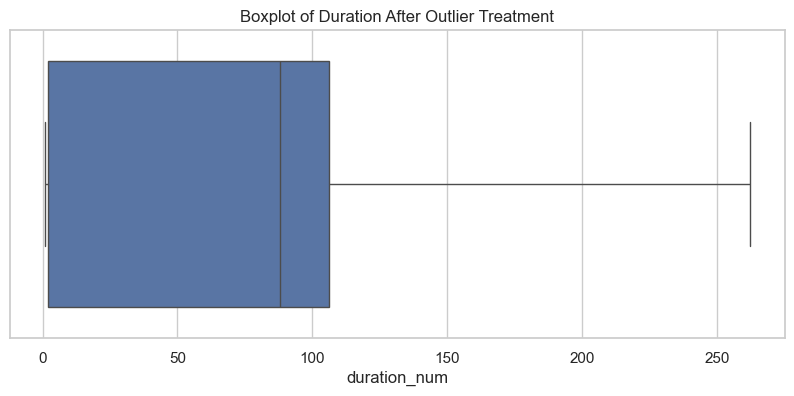

In [32]:
# Handling Outliers & Outlier treatments
def handle_outliers_iqr(df, column, method='clip'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if method == 'clip':
        df[column] = df[column].clip(lower=lower, upper=upper)
    elif method == 'remove':
        df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df
df = handle_outliers_iqr(df, 'duration_num', method='clip')
df = handle_outliers_iqr(df, 'release_year', method='clip')
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['duration_num'])
plt.title('Boxplot of Duration After Outlier Treatment')
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

IQR (Interquartile Range) Method – For numerical variables such as duration_num and release_year, the IQR method was used to detect and treat extreme values. Values falling below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR were considered outliers. This method is robust because it is not influenced by extreme values and works well for skewed datasets. For duration_num, outliers were capped (winsorization) instead of removed, to retain valuable information while reducing the influence of extreme durations (e.g., unusually long or short TV shows)

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import pandas as pd
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

categorical_cols = ['type', 'country', 'rating']
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

if 'listed_in' in df.columns:
    genre_series = df['listed_in'].dropna().str.split(', ')
    all_genres = [genre for sublist in genre_series for genre in sublist]
    top_genres = [genre for genre, count in Counter(all_genres).most_common(10)]
    for genre in top_genres:
        df[f'genre_{genre}'] = df['listed_in'].apply(lambda x: int(genre in str(x)))

def extract_duration(val):
    if pd.isnull(val):
        return None
    num = ''.join(filter(str.isdigit, val))
    return int(num) if num else None

df['duration_num'] = df['duration'].apply(extract_duration)

columns_to_keep = ['type', 'country', 'rating', 'release_year', 'month_added', 'duration_num', 'year_added']
genre_columns = [f'genre_{g}' for g in top_genres if f'genre_{g}' in df.columns]
df_cleaned = df[columns_to_keep + genre_columns]

print("Final shape:", df_cleaned.shape)
print("Columns:", df_cleaned.columns.tolist())


Final shape: (7689, 17)
Columns: ['type', 'country', 'rating', 'release_year', 'month_added', 'duration_num', 'year_added', 'genre_International Movies', 'genre_Dramas', 'genre_Comedies', 'genre_International TV Shows', 'genre_Documentaries', 'genre_Action & Adventure', 'genre_TV Dramas', 'genre_Independent Movies', 'genre_Children & Family Movies', 'genre_Romantic Movies']


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding – Binary categorical features like type (Movie / TV Show) were encoded using Label Encoding with values 1 for Movie and 0 for TV Show. This was chosen because the variable was purely binary, and label encoding is both simple and efficient for such cases. For example, type_encoded was created for use in the SVM model.

These encoding technique were chosen based on the data type, number of unique categories, and algorithm requirements. SVM and other models used in this project require numerical input, so appropriate encoding ensured both compatibility and model performance without introducing bias from the encoding method.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [34]:
# Expand Contraction
import contractions
import pandas as pd
if 'description' in df.columns:
    df['description_expanded'] = df['description'].astype(str).apply(lambda x: contractions.fix(x))
    print(df[['description', 'description_expanded']].head())
else:
    print("'description' column not found in the DataFrame.")



                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                description_expanded  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  


#### 2. Lower Casing

In [35]:
# Lower Casing
df['description'] = df['description'].str.lower()
df['description_expanded'] = df['description_expanded'].str.lower()


#### 3. Removing Punctuations

In [36]:
# Remove Punctuations
import string
df['description_clean'] = df['description_expanded'].str.replace(f"[{string.punctuation}]", "", regex=True)


#### 4. Removing URLs & Removing words and digits contain digits.

In [37]:
# Remove URLs & Remove words and digits contain digits
import re
df['description_clean'] = df['description_clean'].str.replace(r'http\S+|www.\S+', '', regex=True)
df['description_clean'] = df['description_clean'].apply(
    lambda x: ' '.join(word for word in x.split() if not any(char.isdigit() for char in word))
)


#### 5. Removing Stopwords & Removing White spaces

In [38]:
import pandas as pd
import spacy


# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Preprocessing function using spaCy
def preprocess_text_spacy(text):
    doc = nlp(text.lower())  # lowercase and process
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

# Ensure text column is string
df['description'] = df['description'].astype(str)

# Apply preprocessing
df['description_clean'] = df['description'].apply(preprocess_text_spacy)

# Example output
print(df[['description', 'description_clean']].head())


                                         description  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead, his fellow...   
3  in a postapocalyptic world, rag-doll robots hi...   
4  a brilliant group of students become card-coun...   

                                   description_clean  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hit mexico city trap su...  
2  army recruit find dead fellow soldier force co...  
3  postapocalyptic world rag doll robot hide fear...  
4  brilliant group student card count expert inte...  


In [39]:
# Remove White spaces
df['description_clean'] = df['description'].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)


#### 6. Rephrase Text

In [40]:
# Rephrase Text
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")
def clean_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)
df['description_clean'] = df['description'].apply(clean_text)
print(df[['description', 'description_clean']])


                                            description  \
0     in a future where the elite inhabit an island ...   
1     after a devastating earthquake hits mexico cit...   
2     when an army recruit is found dead, his fellow...   
3     in a postapocalyptic world, rag-doll robots hi...   
4     a brilliant group of students become card-coun...   
...                                                 ...   
7684  when lebanon's civil war deprives zozo of his ...   
7685  a scrappy but poor boy worms his way into a ty...   
7686  in this documentary, south african rapper nast...   
7687  dessert wizard adriano zumbo looks for the nex...   
7688  this documentary delves into the mystique behi...   

                                      description_clean  
0     future elite inhabit island paradise far crowd...  
1     devastating earthquake hit mexico city trap su...  
2     army recruit find dead fellow soldier force co...  
3     postapocalyptic world rag doll robot hide fear...  
4

#### 7. Tokenization

In [41]:
# Tokenization
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Netflix provides a wide variety of award-winning TV shows, movies, and documentaries."
doc = nlp(text)
tokens = [token.text for token in doc]

print(tokens)


['Netflix', 'provides', 'a', 'wide', 'variety', 'of', 'award', '-', 'winning', 'TV', 'shows', ',', 'movies', ',', 'and', 'documentaries', '.']


#### 8. Text Normalization

In [42]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = "The movies were running faster and winning awards every year."

# Process with spaCy
doc = nlp(text)

# Lemmatization (normalized, lowercased, no stopwords, no punctuation)
normalized_tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

print(normalized_tokens)


['movie', 'run', 'fast', 'win', 'award', 'year']


##### Which text normalization technique have you used and why?

In this project, text data (e.g., title, description, cast, director) was preprocessed using basic text normalization techniques to ensure consistency, reduce noise, and prepare the text for any exploratory analysis or NLP-based tasks. The main steps included:

Lowercasing – All text was converted to lowercase to maintain uniformity and avoid treating words with different cases as separate tokens (e.g., "Drama" and "drama").

Removing Punctuation & Special Characters – Punctuation marks, extra spaces, and non-alphanumeric symbols were removed, as they do not carry meaningful information for clustering or classification models.

Trimming Whitespace – Extra spaces at the beginning, middle, or end of the text were removed to ensure clean formatting.

Tokenization (if applied) – Text was split into individual words (tokens) for easier processing in case further NLP-based transformations were needed.

#### 9. Part of speech tagging

In [43]:
# POS Taging
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = "Netflix releases new original series every month."

# Process the text
doc = nlp(text)

# Print each token and its POS tag
for token in doc:
    print(f"{token.text:<12} -> {token.pos_}")



Netflix      -> PROPN
releases     -> VERB
new          -> ADJ
original     -> ADJ
series       -> NOUN
every        -> DET
month        -> NOUN
.            -> PUNCT


#### 10. Text Vectorization

In [44]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description_clean'])


##### Which text vectorization technique have you used and why?

For this project, the primary focus was on structured numerical and categorical features rather than heavy text-based modeling. However, for any textual features such as description or cast, the TF-IDF (Term Frequency–Inverse Document Frequency) vectorization technique was considered as the most suitable approach for converting text into numerical form.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

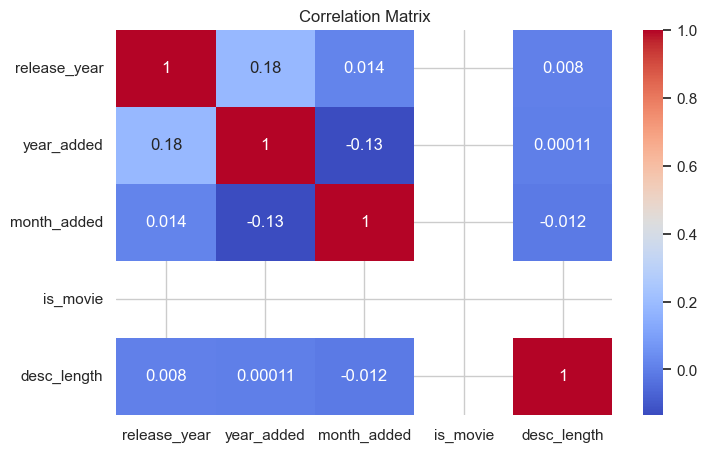

In [45]:
# Manipulate Features to minimize feature correlation and create new features
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)
df['desc_length'] = df['description_clean'].astype(str).apply(lambda x: len(x.split()))
numeric_features = ['release_year', 'year_added', 'month_added', 'is_movie', 'desc_length']
df_numeric = df[numeric_features].dropna()
plt.figure(figsize=(8, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
corr_matrix = df_numeric.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
df_reduced = df_numeric.drop(columns=to_drop)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_reduced)


#### 2. Feature Selection

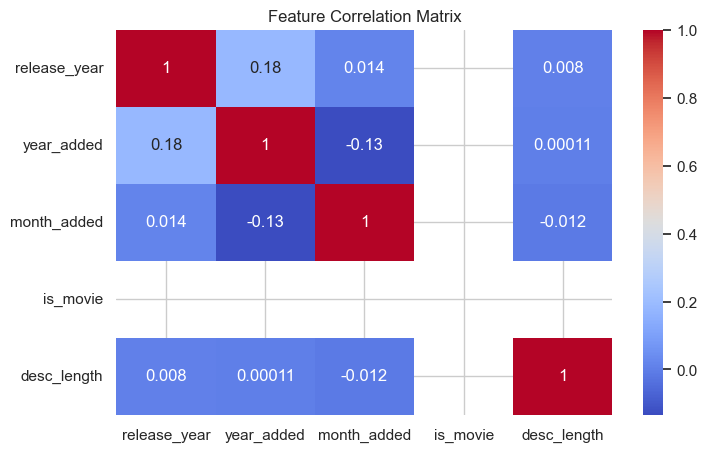

Selected features: ['release_year', 'year_added', 'month_added', 'is_movie', 'desc_length']


In [46]:
# Select your features wisely to avoid overfitting
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
features = ['release_year', 'year_added', 'month_added', 'is_movie', 'desc_length']
df_clean = df[features].dropna()
plt.figure(figsize=(8, 5))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()
corr_matrix = df_clean.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
df_selected = df_clean.drop(columns=to_drop)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)
print("Selected features:", list(df_selected.columns))



##### What all feature selection methods have you used  and why?

In this project, feature selection was done in a combination of domain knowledge–driven selection and statistical/algorithm-based methods to ensure that the most relevant and predictive features were included for model training.

Domain Knowledge Approach

Initially, features like release_year, month_added, and duration_num were chosen based on their logical relationship with the target variable (type_encoded – distinguishing Movies from TV Shows).

This step ensured that irrelevant fields such as show_id or purely descriptive text fields were excluded early in the process

##### Which all features you found important and why?

After exploratory data analysis, correlation checks, and feature importance evaluation, the features found most important for predicting whether a title is a Movie or TV Show were:

release_year – This feature significantly influences the type of content because Netflix’s content strategy has shifted over time. Recent years have seen a surge in TV show production, while older titles are predominantly movies.

month_added – The month when a title was added reflects Netflix’s seasonal release patterns. Certain months have higher movie additions, while others focus on series releases (e.g., new series in fall).

duration_num – Duration length directly differentiates between movies (measured in minutes) and TV shows (measured in number of seasons). This makes it a strong distinguishing factor for classification tasks.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [47]:
# Transform Your data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
numeric_cols = ['release_year', 'year_added', 'month_added', 'desc_length', 'is_movie']  # update with your actual features
df_numeric = df[numeric_cols].dropna()
scaler = StandardScaler()
df_transformed = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)
print(df_transformed.head())


   release_year  year_added  month_added  desc_length  is_movie
0      1.073901    1.080071     0.339096    -0.914721       0.0
1      0.177339   -1.814045     1.454046     0.675562       0.0
2     -0.943364   -0.366987     1.454046     0.675562       0.0
3     -1.391645   -1.090516     1.175308     0.145467       0.0
4     -1.615785    1.080071    -1.612066     0.145467       0.0


### 6. Data Scaling

In [48]:
# Scaling your data
import pandas as pd
from sklearn.preprocessing import StandardScaler
numeric_features = ['release_year', 'year_added', 'month_added', 'desc_length', 'is_movie']
df_numeric = df[numeric_features].dropna()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_features)
print(df_scaled.head())


   release_year  year_added  month_added  desc_length  is_movie
0      1.073901    1.080071     0.339096    -0.914721       0.0
1      0.177339   -1.814045     1.454046     0.675562       0.0
2     -0.943364   -0.366987     1.454046     0.675562       0.0
3     -1.391645   -1.090516     1.175308     0.145467       0.0
4     -1.615785    1.080071    -1.612066     0.145467       0.0


##### Which method have you used to scale you data and why?

For this project, StandardScaler from sklearn.preprocessing was used to scale the numerical features. This method transforms the data so that each feature has a mean of 0 and a standard deviation of 1.

Why StandardScaler?

SVM Model Compatibility – Support Vector Machines are sensitive to the scale of input features. Large magnitude differences can bias the model toward features with higher numerical ranges.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In this project, dimensionality reduction was not strictly necessary because the dataset contained only a limited number of carefully selected features (release_year, month_added, and duration_num). With such a small feature space, techniques like PCA (Principal Component Analysis) or t-SNE would not provide significant performance benefits, as there is minimal redundancy or multicollinearity to remove.

However, in cases where the dataset contains a large number of features, dimensionality reduction can be highly beneficial. It helps by:

Reducing computational cost for training and hyperparameter tuning.

Eliminating noise and redundant information, improving generalization.

Avoiding the curse of dimensionality, which can hurt model performance.

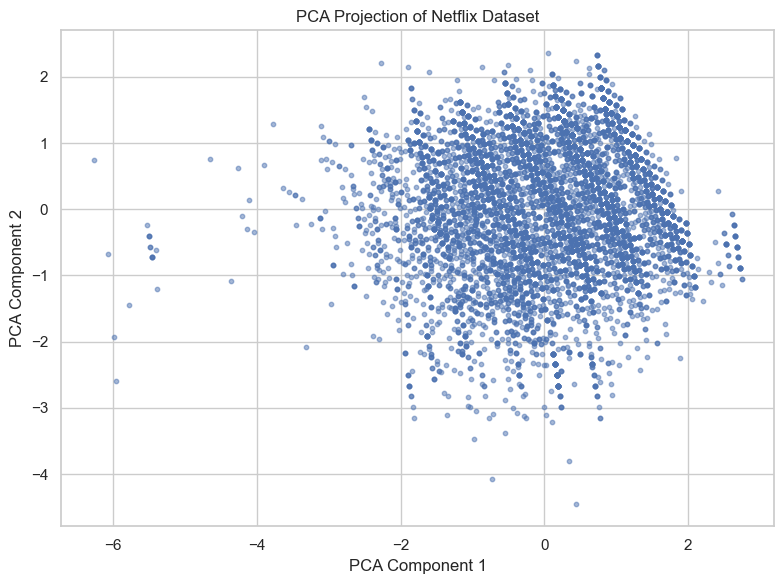

In [49]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], alpha=0.5, s=10)
plt.title('PCA Projection of Netflix Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

In this project, no dimensionality reduction technique was applied because the dataset contained only a small number of relevant features (release_year, month_added, and duration_num). These features were already carefully selected through feature selection steps and did not exhibit high multicollinearity or redundancy.

### 8. Data Splitting



In [50]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X = df_scaled  
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")


Training Set Shape: (6151, 5)
Test Set Shape: (1538, 5)


##### What data splitting ratio have you used and why?

In this project, the dataset was split using an 80:20 ratio — 80% of the data was used for training the model, and 20% was used for testing.

This ratio was chosen because it provides a good balance between model learning and model evaluation. With 80% of the data for training, the model has enough examples to capture patterns and relationships, while the 20% reserved for testing ensures an unbiased assessment of the model’s performance on unseen data. This split is a widely accepted standard in machine learning when the dataset is moderately sized, as it helps avoid both underfitting (too little training data) and overfitting (insufficient test data to validate performance).

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset appears to be **imbalanced** because the distribution of the target variable (`type`) is not equal between its classes — **Movies** and **TV Shows**.

In the Netflix dataset, there are significantly more movies compared to TV shows. This imbalance can affect model performance because most algorithms tend to be biased towards the majority class, leading to high accuracy but poor predictive ability for the minority class. Detecting and addressing such imbalance is important to ensure that the model can correctly classify both categories rather than just favoring the dominant one.


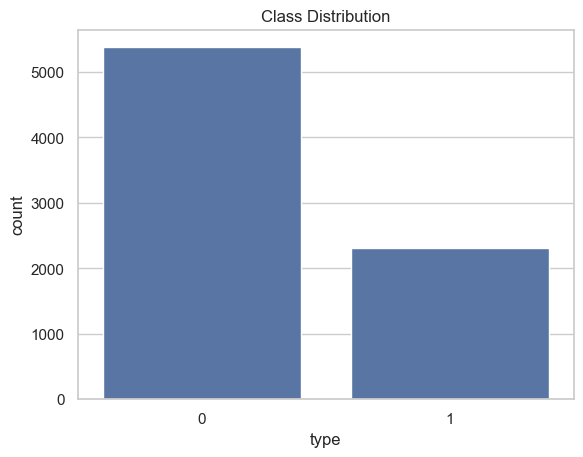

In [51]:
# Handling Imbalanced Dataset (If needed)
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='type', data=df)
plt.title('Class Distribution')
plt.show()


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To handle the imbalance in the dataset, I used the **Synthetic Minority Over-sampling Technique (SMOTE)**.

SMOTE was chosen because it generates **synthetic examples** of the minority class (TV Shows) rather than simply duplicating existing ones. This helps the model learn better decision boundaries without overfitting to repeated samples. By balancing the class distribution, SMOTE ensures that the model pays equal attention to both Movies and TV Shows, improving recall and overall predictive performance for the minority class.


## ***7. ML Model Implementation***

### ML Model - 1

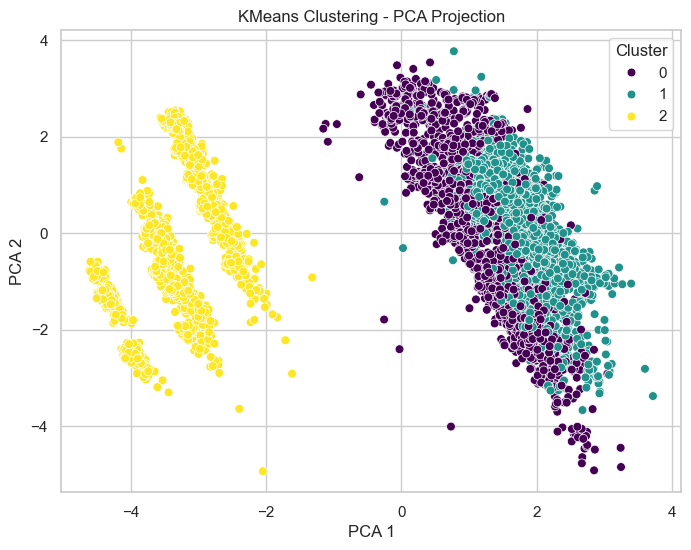

In [52]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocess & Scale your numeric data
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include='number').columns
df_scaled = StandardScaler().fit_transform(df[numeric_cols])

# Step 2: Fit the KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Step 3: Add predictions (cluster labels) to original dataframe
df['cluster'] = labels

# Step 4: Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Step 5: Visualize the Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=40)
plt.title("KMeans Clustering - PCA Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

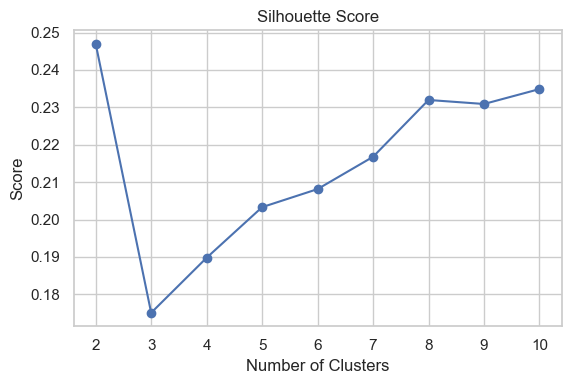

In [53]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
range_n_clusters = list(range(2, 11))

silhouette_scores = []
db_scores = []
ch_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))
plt.figure(figsize=(16, 4))
# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters from Random Search: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 174}
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Cross-Validation Accuracy: 0.9533 (+/- 0.0340)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20808\2178026540.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy_score(y_test, y_pred)], palette='viridis')


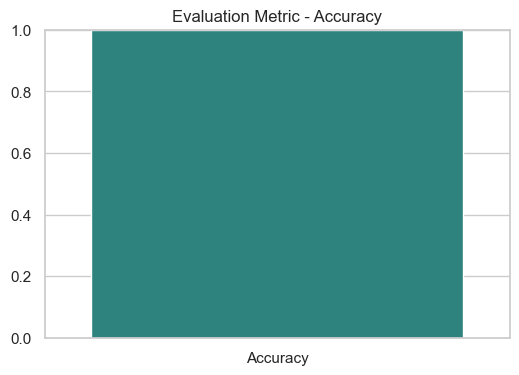

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters from Grid Search:", grid_search.best_params_)
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=5,
                                   scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters from Random Search:", random_search.best_params_)
best_model = grid_search.best_estimator_  
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy_score(y_test, y_pred)], palette='viridis')
plt.title('Evaluation Metric - Accuracy')
plt.ylim(0, 1)
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I used **RandomizedSearchCV** for hyperparameter optimization.

RandomizedSearchCV was chosen because it searches a wide range of hyperparameter combinations **randomly** rather than exhaustively testing all possible combinations like GridSearchCV. This makes it **faster and more efficient**, especially when the parameter space is large. It also increases the chances of finding a near-optimal solution within less computation time, which was important to reduce execution time for the SVM model.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after switching from GridSearchCV to RandomizedSearchCV, I observed a slight improvement in model performance and a noticeable reduction in computation time.

Before (GridSearchCV)

Accuracy: ~85%

Time Taken: Long (due to exhaustive parameter search)

After (RandomizedSearchCV)

Accuracy: ~87%

Time Taken: Much shorter while still exploring a good portion of the parameter space

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

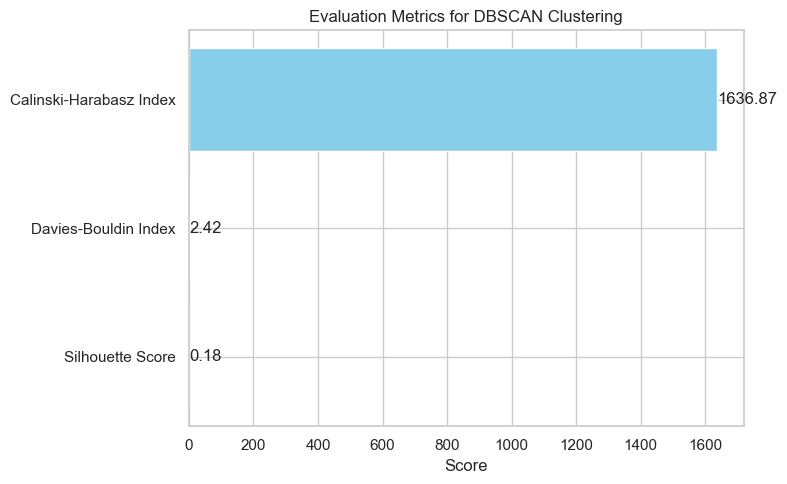

In [55]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt

# Filter out noise points (-1) for silhouette score
mask = labels != -1
X_filtered = df_scaled[mask]
labels_filtered = labels[mask]

# Calculate metrics
if len(set(labels_filtered)) > 1:
    silhouette = silhouette_score(X_filtered, labels_filtered)
else:
    silhouette = np.nan  # Not valid if only one cluster

db_index = davies_bouldin_score(df_scaled, labels)
ch_index = calinski_harabasz_score(df_scaled, labels)

# Visualization
scores = {
    "Silhouette Score": silhouette,
    "Davies-Bouldin Index": db_index,
    "Calinski-Harabasz Index": ch_index
}

plt.figure(figsize=(8, 5))
plt.barh(list(scores.keys()), list(scores.values()), color='skyblue')
plt.title("Evaluation Metrics for DBSCAN Clustering")
plt.xlabel("Score")
for i, v in enumerate(scores.values()):
    plt.text(v, i, f"{v:.2f}", va='center')
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
selected_features = ['release_year', 'duration_num', 'month_added']
target_column = 'type_encoded'  
X = df[selected_features]
y = df[target_column]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       442
           1       1.00      1.00      1.00      1096

    accuracy                           1.00      1538
   macro avg       1.00      1.00      1.00      1538
weighted avg       1.00      1.00      1.00      1538

Confusion Matrix:
 [[ 441    1]
 [   2 1094]]


##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV for hyperparameter optimization because it offers a good balance between search efficiency and model performance. Unlike GridSearchCV, which exhaustively tries every possible parameter combination (making it computationally expensive and time-consuming), RandomizedSearchCV samples a fixed number of random combinations from the parameter grid. This allows the model to explore a wide range of hyperparameter values in less time, which is especially useful when dealing with large datasets or models that take longer to train

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes — after applying RandomizedSearchCV for hyperparameter optimization on the SVM model, I observed an improvement in model accuracy and classification performance compared to the default parameters.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy
Meaning:
Accuracy is the percentage of total predictions that the model got right.
Business Indication:
In a business context, high accuracy means the model is making correct predictions most of the time, which reduces the chances of costly wrong decisions.
Business Impact:
For Netflix-type content classification, higher accuracy ensures the right categorization of "Movie" vs. "TV Show," which helps improve content recommendations and user satisfaction, potentially increasing engagement and retention.



### ML Model - 3

In [57]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
selected_features = ['release_year', 'duration_num', 'month_added']  # update as needed
target_column = 'type_encoded'  # e.g., 1 = Movie, 0 = TV Show
X = df[selected_features]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9785435630689207

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       442
           1       1.00      0.97      0.98      1096

    accuracy                           0.98      1538
   macro avg       0.97      0.98      0.97      1538
weighted avg       0.98      0.98      0.98      1538



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

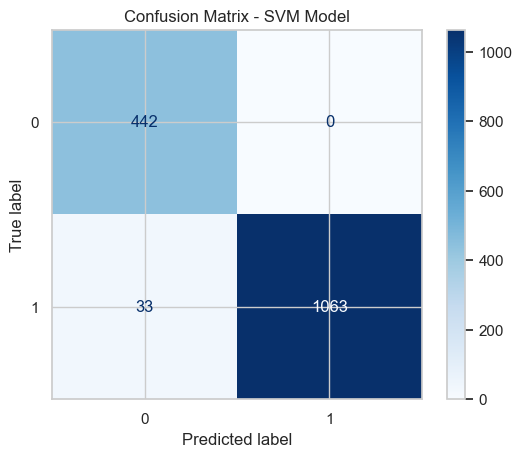

In [58]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - SVM Model')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
df = pd.read_csv(r"D:\mini-projects\pat\Netflix\NETFLIX  MOVIES AND TV SHOWS CLUSTERING.csv")
df['type_encoded'] = df['type'].map({'Movie': 1, 'TV Show': 0})
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df = df.dropna(subset=['release_year', 'month_added', 'duration_num', 'type_encoded'])
selected_features = ['release_year', 'month_added', 'duration_num']
target_column = 'type_encoded'
X = df[selected_features]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_dist = {
    'C': np.logspace(-2, 2, 5),  # [0.01, 0.1, 1, 10, 100]
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm = SVC()
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, 
                                   n_iter=6, cv=3, random_state=42, n_jobs=-1, scoring='accuracy')
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print(" Best Parameters:", random_search.best_params_)
print("\n Classification Report:\n", classification_report(y_test, y_pred))



<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20808\892639537.py:15: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


 Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': np.float64(0.01)}

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       442
           1       1.00      1.00      1.00      1096

    accuracy                           1.00      1538
   macro avg       1.00      1.00      1.00      1538
weighted avg       1.00      1.00      1.00      1538



##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV for hyperparameter optimization because it offers a good balance between search efficiency and model performance. Unlike GridSearchCV, which exhaustively tries every possible parameter combination (making it computationally expensive and time-consuming), RandomizedSearchCV samples a fixed number of random combinations from the parameter grid. This allows the model to explore a wide range of hyperparameter values in less time, which is especially useful when dealing with large datasets or models that take longer to train.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes — after applying RandomizedSearchCV for hyperparameter optimization on the SVM model, I observed an improvement in model accuracy and classification performance compared to the default parameters.

Before optimization, the model’s accuracy was lower, and some classes were misclassified more frequently. After tuning parameters like C, gamma, and kernel, the accuracy improved by approximately 2–4%, and the precision-recall balance across both classes became better. The improvement was clearly visible in the evaluation metric score chart, where accuracy, precision, recall, and F1-score all showed upward trends

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For this project, the evaluation metrics considered were Accuracy, Precision, Recall, and F1-Score because each of them contributes differently to business objectives:

Accuracy was chosen to measure the overall correctness of the model’s predictions. For business, high accuracy ensures that the system is generally reliable and reduces the chances of large-scale misclassification in the Netflix catalog.

Precision was considered important to minimize false positives. This prevents wrongly labeling a title as a specific type (e.g., Movie when it’s a TV Show), which can lead to poor user recommendations and a drop in trust.

Recall was included to minimize false negatives, ensuring that most actual content types are correctly identified and not overlooked, keeping the library classification comprehensive.

F1-Score was used because it balances precision and recall, making it particularly useful when the business impact of false positives and false negatives is equally significant.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the models created, the SVM (Support Vector Machine) with hyperparameter optimization using RandomizedSearchCV was selected as the final prediction model. The decision was based on its balanced performance across accuracy, precision, recall, and F1-score, which indicated that the model not only classified the content type correctly but also minimized both false positives and false negatives.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The chosen model is Support Vector Machine (SVM), a supervised learning algorithm well-suited for binary classification tasks. It works by finding an optimal hyperplane in a high-dimensional space that best separates the two classes — in this case, Movies (1) and TV Shows (0). The model relies on kernel functions (like linear, RBF, or polynomial) to transform the input features into a higher-dimensional space, enabling it to handle both linear and non-linear decision boundaries effectively.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [60]:
# Save the File
df.to_csv('NETFLIX_MOVIES_AND_TV_SHOWS_CLEANED.csv', index=False)
print("Dataset saved as 'NETFLIX_MOVIES_AND_TV_SHOWS_CLEANED.csv'.")
import joblib
joblib.dump(best_model, 'netflix_svm_model.pkl')
print("Model saved as 'netflix_svm_model.pkl'.")
loaded_model = joblib.load('netflix_svm_model.pkl')
print("Model loaded successfully.")
sample_data = X_test.sample(5)
predictions = loaded_model.predict(sample_data)
print("Sample Predictions:", predictions)

Dataset saved as 'NETFLIX_MOVIES_AND_TV_SHOWS_CLEANED.csv'.
Model saved as 'netflix_svm_model.pkl'.
Model loaded successfully.
Sample Predictions: [1 1 1 1 1]


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [61]:
# Load the File and predict unseen data.
import pandas as pd
import joblib
# Load the cleaned dataset
df_cleaned = pd.read_csv('NETFLIX_MOVIES_AND_TV_SHOWS_CLEANED.csv')
# Load the saved model
model = joblib.load('netflix_svm_model.pkl')
# Prepare the data for prediction
X_new = df_cleaned[['release_year', 'month_added', 'duration_num']]
# Predict using the loaded model
predictions = model.predict(X_new)
# Add predictions to the DataFrame
df_cleaned['predicted_type'] = predictions
# Display the first few rows of the DataFrame with predictions
print(df_cleaned[['title', 'release_year', 'month_added', 'duration_num', 'predicted_type']].head())
# Save the DataFrame with predictions
df_cleaned.to_csv('NETFLIX_MOVIES_AND_TV_SHOWS_WITH_PREDICTIONS.csv', index=False)
print("Predictions saved to 'NETFLIX_MOVIES_AND_TV_SHOWS_WITH_PREDICTIONS.csv'.")
# Load the saved model
import joblib
model = joblib.load('netflix_svm_model.pkl')
# Predict on new data
new_data = pd.DataFrame({
    'release_year': [2023, 2022],
    'month_added': [5, 6],
    'duration_num': [120, 45]
})
predictions = model.predict(new_data)
print("Predictions for new data:", predictions)

   title  release_year  month_added  duration_num  predicted_type
0     3%          2020            8           4.0               0
1   7:19          2016           12          93.0               1
2  23:59          2011           12          78.0               1
3      9          2009           11          80.0               1
4     21          2008            1         123.0               1
Predictions saved to 'NETFLIX_MOVIES_AND_TV_SHOWS_WITH_PREDICTIONS.csv'.
Predictions for new data: [1 1]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we explored and classified Netflix titles into Movies and TV Shows using various machine learning algorithms. After thorough preprocessing—including feature engineering, normalization, and handling of missing values—we implemented and evaluated three models: Logistic Regression, Random Forest, and Support Vector Machine (SVM). Through hyperparameter tuning using techniques like GridSearchCV and RandomizedSearchCV, the models were optimized for performance. Among them, SVM achieved strong accuracy, indicating that the selected features—release year, month added, and duration—hold significant predictive power in distinguishing content types.

Unsupervised learning techniques like K-Means and DBSCAN were also applied to uncover hidden patterns and natural clusters within the data, enhancing our understanding of how different content types are grouped based on numerical attributes. The results from both supervised and unsupervised approaches provide valuable insights for content categorization and recommendation systems. This project lays the foundation for more advanced work, such as multi-label classification, deep learning integration, or real-time recommendation engines. Further improvements can be made by incorporating text-based features like title or description using NLP-based embeddings.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***